In [40]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from dbhandler import DBHandler
from datetime import datetime
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
import matplotlib
import warnings

In [41]:
warnings.filterwarnings('ignore')
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
krfont = {'family':font_name, 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

In [42]:
conn = sqlite3.connect('./data/cetizen.db')
db = DBHandler(conn)

In [43]:
상품정보 = db.getTableAll('상품정보').drop(['LAST_MODIFIED_BY', 'LAST_UPDATE_DATE'], axis=1)
#출고가정보 = db.getTableAll('출고가정보').drop(['LAST_MODIFIED_BY', 'LAST_UPDATE_DATE'], axis=1)
중고가정보 = db.getTableAll('중고가정보').drop(['LAST_MODIFIED_BY', 'LAST_UPDATE_DATE'], axis=1)
출고가정보_갤럭시 = pd.read_excel('./data/갤럭시_출시일.xlsx', dtype={'용량':str})

In [44]:
출고가정보_갤럭시S = 출고가정보_갤럭시[출고가정보_갤럭시.모델명.str.startswith('SM-G9')]
출고가정보_갤럭시S.loc[출고가정보_갤럭시S.용량 == 'nan', '용량'] = ''
중고가정보.DATE = 중고가정보.DATE.apply(parse)

In [45]:
중고가정보_가공 = 중고가정보.merge(상품정보, on='PNO', how='left')

In [46]:
# 갤럭시S 가공(S6 이후만 고려)
갤럭시S = 중고가정보_가공[중고가정보_가공.MODEL.str.startswith('SM-G9')]
갤럭시S = 갤럭시S[~갤럭시S.MODEL.str.contains('자급제')]
갤럭시S['모델명'] = 갤럭시S.MODEL.apply(lambda x:x.split()[0][:-1])
갤럭시S = 갤럭시S[갤럭시S.모델명.isin(['SM-G965', 'SM-G960', 'SM-G950',
                                       'SM-G955', 'SM-G935', 'SM-G930',
                                       'SM-G928', 'SM-G920', 'SM-G925'])]
갤럭시S['용량'] = 갤럭시S.MODEL.apply(lambda x:x.split()[-1])
갤럭시S.loc[갤럭시S['용량'] == 'SM-G950N', '용량'] = ''
갤럭시S['용량'] = 갤럭시S['용량'].str.replace('GB', '')
갤럭시S.head()

,PNO,DATE,LOW,MID,HIGH,WIRELESS,NAME,MODEL,모델명,용량
5873,6723,2019-02-06,532000,553000,569000,S,갤럭시S9 플러스,SM-G965N 64GB,SM-G965,64
5874,6723,2019-02-06,532000,553000,569000,S,갤럭시S9 플러스,SM-G965N 64GB,SM-G965,64
5875,6723,2019-02-06,532000,553000,569000,S,갤럭시S9 플러스,SM-G965N 64GB,SM-G965,64
5876,6723,2019-02-06,532000,553000,569000,S,갤럭시S9 플러스,SM-G965N 64GB,SM-G965,64
5877,6723,2019-02-06,532000,553000,569000,S,갤럭시S9 플러스,SM-G965N 64GB,SM-G965,64


In [47]:
갤럭시S_가공 = 갤럭시S.merge(출고가정보_갤럭시S, on=['모델명', '용량'], how='inner')
갤럭시S_가공.columns = ['상품코드', '기준일', '저가', '중간', '고가', '통신사', 'NAME', 'MODEL', '모델명', '용량', '상품명', '출시일', '출고가']
갤럭시S_가공 = 갤럭시S_가공.drop(['NAME', 'MODEL'], axis=1)
갤럭시S_가공['경과일'] = (갤럭시S_가공['기준일'] - 갤럭시S_가공['출시일']).apply(lambda x:x.days)
갤럭시S_가공['출고가대비'] = 갤럭시S_가공['중간']/갤럭시S_가공['출고가']*100
갤럭시S_가공.head()

,상품코드,기준일,저가,중간,고가,통신사,모델명,용량,상품명,출시일,출고가,경과일,출고가대비
0,6723,2019-02-06,532000,553000,569000,S,SM-G965,64,갤럭시 S9+,2018-03-16,1056000,327,52.367424
1,6723,2019-02-06,532000,553000,569000,S,SM-G965,64,갤럭시 S9+,2018-03-16,1056000,327,52.367424
2,6723,2019-02-06,532000,553000,569000,S,SM-G965,64,갤럭시 S9+,2018-03-16,1056000,327,52.367424
3,6723,2019-02-06,532000,553000,569000,S,SM-G965,64,갤럭시 S9+,2018-03-16,1056000,327,52.367424
4,6723,2019-02-06,532000,553000,569000,S,SM-G965,64,갤럭시 S9+,2018-03-16,1056000,327,52.367424


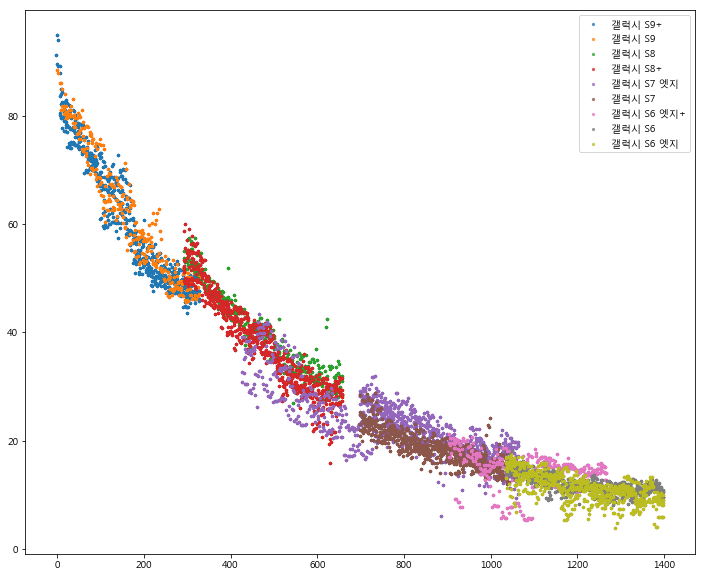

In [51]:
plt.figure(figsize=(12,10))

for 상품명 in 갤럭시S_가공.상품명.unique():
    df = 갤럭시S_가공.query('상품명 == @상품명')
    plt.scatter(df.경과일, df.출고가대비, s=5, alpha=0.7, label=상품명)
plt.legend()
plt.show()

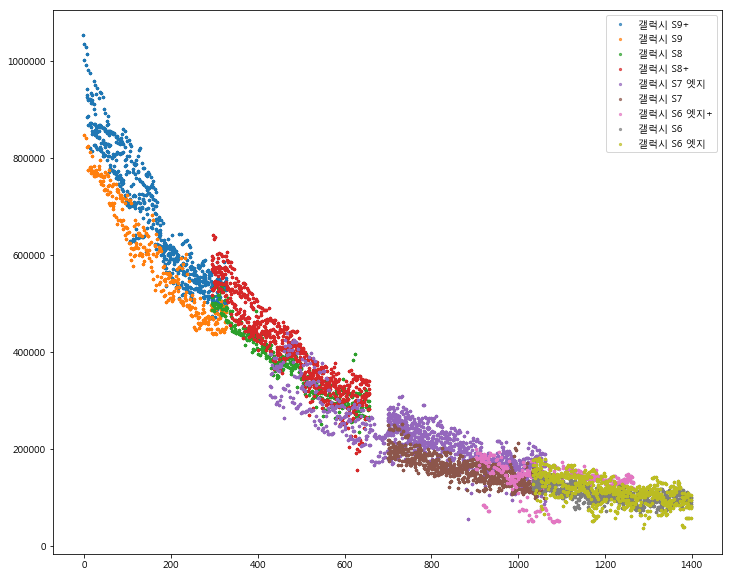

In [52]:
plt.figure(figsize=(12,10))

for 상품명 in 갤럭시S_가공.상품명.unique():
    df = 갤럭시S_가공.query('상품명 == @상품명')
    plt.scatter(df.경과일, df.중간, s=5, alpha=0.7, label=상품명)
plt.legend()
plt.show()